#### 从数据库导入数据

In [1]:
import pymysql.cursors
import pandas as pd

db = pymysql.connect(host='localhost',user='root',password='root',db='lagou',charset='utf8',cursorclass=pymysql.cursors.DictCursor)
cursor = db.cursor()
sql = 'SELECT * FROM dataset;'
cursor.execute(sql)
result = cursor.fetchall()
df = pd.DataFrame(list(result))
db.close()

df

,jobNature,companySize,workYear,education,industryField,thirdType,salaryMin,salaryMax,nameUnfit,positionId,...,financeStage,firstType,secondType,district,salary,resumeProcessRate,resumeProcessDay,score,famousCompany,isFocus
0,全职,500-2000人,1-3年,本科,旅游,数据分析,18,35,0,6112946,...,D轮及以上,开发|测试|运维类,数据开发,福田区,18k-35k,100,1,199,0,1
1,全职,500-2000人,3-5年,本科,"消费生活,移动互联网",商业,15,25,0,6229664,...,C轮,产品|需求|项目类,数据分析,南山区,15k-25k,100,1,179,0,1
2,全职,2000人以上,5-10年,本科,金融,建模,15,30,0,6853427,...,上市公司,开发|测试|运维类,数据开发,福田区,15k-30k,100,1,130,1,0
3,全职,2000人以上,1-3年,本科,金融,Hadoop,20,30,0,6692363,...,不需要融资,开发|测试|运维类,数据开发,南山区,20k-30k,100,2,89,0,0
4,全职,2000人以上,1-3年,大专,"移动互联网,游戏",数据分析,8,10,0,6835783,...,不需要融资,产品|需求|项目类,数据分析,南山区,8k-10k,0,1,69,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,全职,2000人以上,3-5年,本科,社交,产品经理,15,25,1,5276304,...,上市公司,产品|需求|项目类,产品经理,南山区,15k-25k,100,1,10,1,0
271,全职,2000人以上,3-5年,本科,社交,数据挖掘,18,35,0,6842800,...,上市公司,开发|测试|运维类,数据开发,南山区,18k-35k,100,1,10,1,1
272,全职,2000人以上,3-5年,本科,社交,数据分析,20,40,0,5250466,...,上市公司,产品|需求|项目类,数据分析,南山区,20k-40k,100,1,10,1,1
273,全职,2000人以上,1-3年,本科,金融,数据分析,20,30,0,6391267,...,未融资,开发|测试|运维类,数据开发,南山区,20k-30k,15,1,4,1,0


#### 拆分训练集和测试集

In [2]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
X = pd.get_dummies(X).values
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
feature_names = pd.get_dummies(df.iloc[:,:-1]).columns
feature_names

Index(['salaryMin', 'salaryMax', 'nameUnfit', 'resumeProcessRate',
       'resumeProcessDay', 'score', 'famousCompany', 'jobNature_全职',
       'jobNature_兼职', 'jobNature_实习',
       ...
       'salary_7k-13k', 'salary_7k-14k', 'salary_8k-10k', 'salary_8k-11k',
       'salary_8k-12k', 'salary_8k-13k', 'salary_8k-15k', 'salary_8k-16k',
       'salary_9k-12k', 'salary_9k-14k'],
      dtype='object', length=687)

### 一、画ROC曲线图（scikit-learn版本至少0.22）

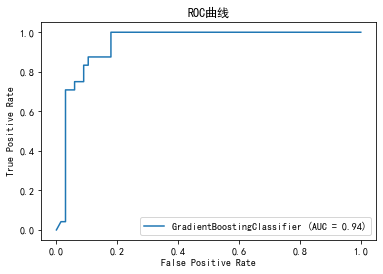

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

clf_disp = plot_roc_curve(clf, X_test, y_test)
plt.title('ROC曲线')
plt.show()

### 二、把训练集和测试集的ROC图画在一起

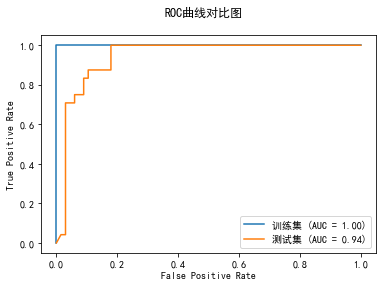

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

clf_disp_train = plot_roc_curve(clf, X_train, y_train, name='训练集')
clf_disp_test = plot_roc_curve(clf, X_test, y_test, name='测试集', ax=clf_disp_train.ax_)

clf_disp_test.figure_.suptitle('ROC曲线对比图')
plt.show()

#ax = plt.gca()
#clf_disp_train = plot_roc_curve(clf, X_train, y_train, ax=ax, name='训练集')
#clf_disp.plot(ax=ax, name='测试集')
#plt.show()

### 三、把两个模型的ROC曲线画在同一个图里

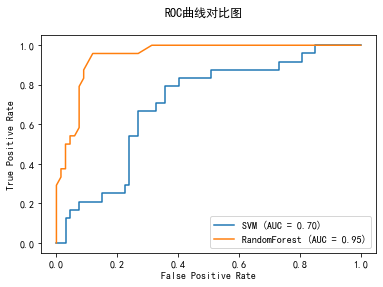

In [5]:
from sklearn.metrics import plot_roc_curve
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

svc_disp = plot_roc_curve(svc, X_test, y_test, name='SVM')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, name='RandomForest', ax=svc_disp.ax_)

rfc_disp.figure_.suptitle('ROC曲线对比图')
plt.show()